In [1]:
from pathlib import Path
import pandas as pd

# Define current work directory
current_dir = Path.cwd()

In [2]:
#Access input folder
input_dir1 = Path ("G:/Chamodi/LSDYNA3D/RP_TH_models/RP_section_datasets")
#print ("INPUT 1",input_dir1)

#Access folders inside input folder
input_dir2 =  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()]
#print ("INPUT 2",input_dir2)

In [3]:
#Access input folder
input_dir1a = Path ("G:/Chamodi/LSDYNA3D/RP_TH_models/RP_section_datasets_reduced")
#print ("INPUT 1",input_dir1)

#Access folders inside input folder
input_dir2a =  [folder1a for folder1a in input_dir1a.iterdir() if folder1a.is_dir()]
#print ("INPUT 2",input_dir2)

## Open RP_all_all excel file

In [4]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Standoff distance", "Max pressure", "Min pressure", "Number of datapoints"])

In [5]:
# Initialize an empty DataFrame to store results
results_dfa = pd.DataFrame(columns=["Standoff distance", "Max pressure", "Min pressure", "Number of datapoints"])

In [6]:
results = []
for folder1 in input_dir2: # folder1-RP_curves_fr5m
    
    SD = int(folder1.name[-3:-1])

    input_dir3 =  [folder2 for folder2 in folder1.iterdir() if folder2.is_dir()]
    
    max_pressure = float('-inf')
    min_pressure = float('inf')
    total_datapoints = 0
    
    for folder2 in input_dir3: # folder2-05m00.5kg
        
        # Make a list of data file names
        files1 = [file1 for file1 in folder2.rglob("*") if file1.suffix == '.xlsx' and file1.suffix != '.png']
            
        # Access each file 
        for file1 in files1: # file-1.xlsx
                
            # Read data from Excel file
            df1 = pd.read_excel(file1)
            
            pressure_values = df1['Pressure'].dropna().values
            
            # Update the max and min pressure values
            max_pressure = max(max_pressure, pressure_values.max())
            min_pressure = min(min_pressure, pressure_values.min())
            
            # Update the total number of data points
            total_datapoints += len(pressure_values)
                    
    # Collect the results for this folder1
    results.append({
        "Standoff distance": SD,
        "Max pressure": max_pressure,
        "Min pressure": min_pressure,
        "Number of datapoints": total_datapoints
    })
    
# Create a DataFrame with the collected results
results_df = pd.DataFrame(results)

In [7]:
print (results_df)

    Standoff distance  Max pressure  Min pressure  Number of datapoints
0                   5   1321.654375    -11.400758                 68406
1                   7    460.648000     -4.691820                 72776
2                   9    238.152531     -2.592820                114182
3                  11    157.383141     -2.732211                125672
4                  13    104.603141     -2.353211                134468
5                  15     80.886422     -2.092312                146662
6                  17     65.241078     -1.871414                135008
7                  19     49.969328     -1.267211                119229
8                  21     44.464516     -1.081273                113585
9                  23     37.342016     -0.869602                108121
10                 25     32.449906     -0.776906                108008
11                 27     28.972539     -0.742383                106509
12                 29     26.107836     -0.607727               

In [8]:
results_a = []
for folder1a in input_dir2a: # folder1-RP_curves_fr5m
    
    SD_a = int(folder1a.name[-3:-1])

    input_dir3a =  [folder2a for folder2a in folder1a.iterdir() if folder2a.is_dir()]
    
    max_pressure_a = float('-inf')
    min_pressure_a = float('inf')
    total_datapoints_a = 0
    
    for folder2a in input_dir3a: # folder2-05m00.5kg
        
        # Make a list of data file names
        files1a = [file1a for file1a in folder2a.rglob("*") if file1a.suffix == '.xlsx' and file1a.suffix != '.png']
            
        # Access each file 
        for file1a in files1a: # file-1.xlsx
                
            # Read data from Excel file
            df1a = pd.read_excel(file1a)
            
            pressure_values_a = df1a['Pressure'].dropna().values
            
            # Update the max and min pressure values
            max_pressure_a = max(max_pressure_a, pressure_values_a.max())
            min_pressure_a = min(min_pressure_a, pressure_values_a.min())
            
            # Update the total number of data points
            total_datapoints_a += len(pressure_values_a)
                    
    # Collect the results for this folder1
    results_a.append({
        "Standoff distance": SD_a,
        "Max pressure": max_pressure_a,
        "Min pressure": min_pressure_a,
        "Number of datapoints": total_datapoints_a
    })
    
# Create a DataFrame with the collected results
results_df_a = pd.DataFrame(results_a)

In [9]:
print (results_df_a)

    Standoff distance  Max pressure  Min pressure  Number of datapoints
0                   5   1321.654375    -11.400758                 10536
1                   7    460.648000     -4.691820                  9495
2                   9    238.152531     -2.592820                 11192
3                  11    157.383141     -2.732211                 11277
4                  13    104.603141     -2.353211                 11324
5                  15     80.886422     -2.092312                 11641
6                  17     65.241078     -1.871414                 12252
7                  19     49.969328     -1.267211                 10422
8                  21     44.464516     -1.081273                 10638
9                  23     37.342016     -0.869602                 10675
10                 25     32.449906     -0.776906                  8623
11                 27     28.972539     -0.737492                 10422
12                 29     26.107836     -0.602930               

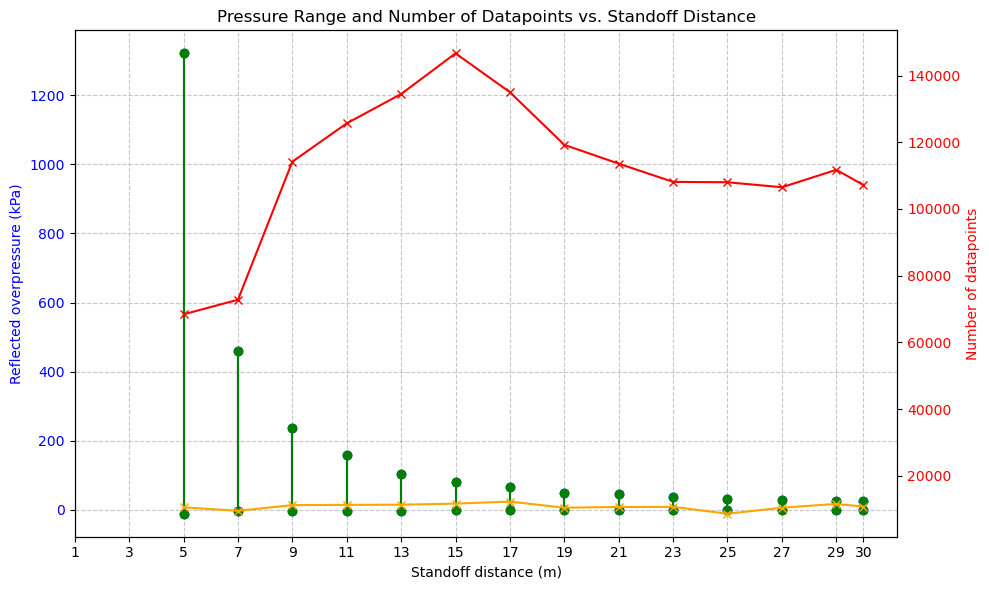

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot max and min pressure values with standoff distance
for _, row in results_df.iterrows():
    ax1.plot([row['Standoff distance'], row['Standoff distance']],
             [row['Min pressure'], row['Max pressure']], color='blue', marker='o')
    
for _, row in results_df_a.iterrows():
    ax1.plot([row['Standoff distance'], row['Standoff distance']],
             [row['Min pressure'], row['Max pressure']], color='green', marker='o')

# Label the primary y-axis (for pressure values)
ax1.set_xlabel('Standoff distance (m)')
ax1.set_ylabel('Reflected overpressure (kPa)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30])

# Create a secondary y-axis for the number of data points
ax2 = ax1.twinx()
ax2.plot(results_df['Standoff distance'], results_df['Number of datapoints'], color='red', marker='x')
ax2.plot(results_df_a['Standoff distance'], results_df_a['Number of datapoints'], color='orange', marker='x')
ax2.set_ylabel('Number of datapoints', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30])

# Add grid lines
ax1.grid(True, linestyle='--', alpha=0.7)

# Title and layout adjustments
plt.title('Pressure Range and Number of Datapoints vs. Standoff Distance')
fig.tight_layout()

# Save the plot as an image
plt.savefig('results_plot.png', dpi=300)

# Show the plot
#plt.show()